In [2]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline

## Loop through all states, no tuning, then do prediction 

When we use one state as an example (shown after this section), before tuning and after tuning, the prediction does not change, which means our default hyperparameters are already quite good. Thus we do not do tuning to save time.

In [3]:
train = pd.read_csv("data/train_df.csv")
test = pd.read_csv("data/test_df.csv")

'2021-10-15'

In [ ]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import joblib
%matplotlib inline


train = pd.read_csv("data/train_df.csv")
test = pd.read_csv("data/test_df.csv")
s_list = train.subregion1_code.unique().tolist()

for i in range(len(s_list)):
    s_train = train[train["subregion1_code"]==s_list[i]]
    s_test = test[test["subregion1_code"]==s_list[i]]
    test_date = s_test.date.tolist()
    
    s_train = s_train.drop(["date","subregion1_code","cumulative_confirmed"], axis = 1)
    s_test = s_test.drop(["date","subregion1_code","cumulative_confirmed"], axis = 1)
    
    s_y_train = s_train.new_confirmed
    s_X_train = s_train.drop(["new_confirmed"], axis = 1)

    s_y_test = s_test.new_confirmed
    s_X_test = s_test.drop(["new_confirmed"], axis = 1)
    
    #train initial model
    rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    rf.fit(s_X_train, s_y_train)
    
    #delete variable that are not important
    forest_importances = pd.Series(rf.feature_importances_, index = s_X_train.columns) 
    no_list = pd.DataFrame(forest_importances[forest_importances<0.001]).index.tolist()
    
    s_X_train_new = s_X_train.drop(no_list, axis = 1)
    s_X_test_new = s_X_test.drop(no_list, axis = 1)
    
    rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    rf2.fit(s_X_train_new, s_y_train)
    
    s_y_pred_new = rf2.predict(s_X_test_new)
    
    #create prediction dataframe
    subregion1_code = [str(s_list[i])] * len(test_date)
    predict_df = pd.DataFrame(list(zip(subregion1_code, test_date, s_y_pred_new)), 
             columns = ["subregion1_code", "date", "predicted_confirmed_cases"])
 
    predict_df.to_csv("prediction/random_forest/" + str(s_list[i] + "_rf.csv"), index = False)
    print(s_list[i])

## For only one state, use NY as an example

In [8]:
train_df = pd.read_csv("data/train_df.csv")
test_df = pd.read_csv("data/test_df.csv")

In [9]:
NY_train = train_df[train_df["subregion1_code"]=="NY"]
NY_test = test_df[test_df["subregion1_code"]=="NY"]
NY_train = NY_train.drop(["date","subregion1_code","cumulative_confirmed"], axis = 1)
NY_test = NY_test.drop(["date","subregion1_code","cumulative_confirmed"], axis = 1)

In [10]:
## NY
NY_y_train = NY_train.new_confirmed
NY_X_train = NY_train.drop(["new_confirmed"], axis = 1)

NY_y_test = NY_test.new_confirmed
NY_X_test = NY_test.drop(["new_confirmed"], axis = 1)

### Train the Random Forest model with default

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(NY_X_train,NY_y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [16]:
NY_y_pred = rf.predict(NY_X_test)
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(NY_y_test, NY_y_pred)))
print('Mean Absolute Error (MAE):', np.sqrt(metrics.mean_absolute_error(NY_y_test, NY_y_pred)))

mape = np.mean(np.abs((NY_y_test - NY_y_pred) / np.abs(NY_y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))

Root Mean Squared Error (RMSE): 2922.5483977513854
Mean Absolute Error (MAE): 49.22977854142851
Mean Absolute Percentage Error (MAPE): 34.45


In [18]:
test_date = test_df[test_df["subregion1_code"]=="NY"].date.tolist()
subregion1_code = ['NY'] * len(test_date)
pd.DataFrame(list(zip(subregion1_code,test_date,NY_y_pred)), 
             columns = ["subregion1_code", "date", "predicted_confirmed_cases"])

,subregion1_code,date,predicted_confirmed_cases
0,NY,2021-10-16,10350.535
1,NY,2021-10-17,10765.371
2,NY,2021-10-18,10660.171
3,NY,2021-10-19,9795.344
4,NY,2021-10-20,10285.304
5,NY,2021-10-21,10842.142
6,NY,2021-10-22,11863.368
7,NY,2021-10-23,9727.126
8,NY,2021-10-24,9319.691
9,NY,2021-10-25,10187.732


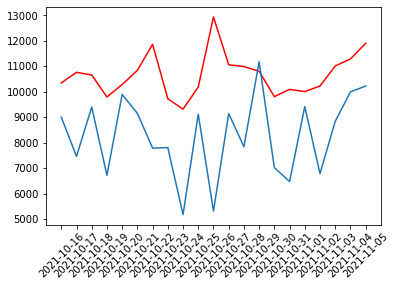

In [20]:
# check model performance
plt.plot(test_df[test_df["subregion1_code"]=="NY"].date, NY_y_pred, c = "red")
plt.plot(test_df[test_df["subregion1_code"]=="NY"].date, NY_y_test) 
plt.xticks(rotation = 45)
pass

### Variable Importance

In [21]:
forest_importances = pd.Series(rf.feature_importances_, index=NY_X_train.columns)
indices = np.argsort(forest_importances)[::-1]

Delete variables with importance lower than 0.001

In [22]:
forest_importances[indices]

mobility_parks                    0.273076
average_temperature_celsius       0.157419
mobility_transit_stations         0.136378
search_trends_common_cold         0.060959
vaccination_policy                0.054827
mobility_grocery_and_pharmacy     0.051761
search_trends_cough               0.025004
search_trends_headache            0.024839
mobility_workplaces               0.022597
search_trends_fever               0.021684
stringency_index                  0.020608
search_trends_sore_throat         0.020481
mobility_retail_and_recreation    0.019895
search_trends_swelling            0.011862
facial_coverings                  0.011589
search_trends_anxiety             0.010934
search_trends_nausea              0.009731
search_trends_asthma              0.008827
search_trends_vomiting            0.008414
mobility_residential              0.007923
search_trends_diarrhea            0.006563
search_trends_pain                0.005808
search_trends_heart_arrhythmia    0.005375
search_tren

In [23]:
no_list = pd.DataFrame(forest_importances[forest_importances<0.001]).index.tolist()
no_list

['population_den',
 'elder_perc',
 'school_closing',
 'public_transport_closing',
 'public_information_campaigns',
 'testing_policy']

In [24]:
NY_X_train_new = NY_X_train.drop(no_list, axis = 1)
NY_X_test_new = NY_X_test.drop(no_list, axis = 1)

In [25]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(NY_X_train_new,NY_y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

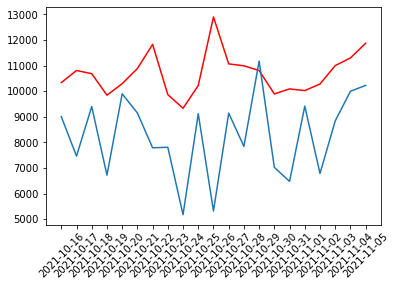

In [26]:
NY_y_pred_new=rf.predict(NY_X_test_new)
# check model performance
plt.plot(test_df[test_df["subregion1_code"]=="NY"].date, NY_y_pred_new, c = "red")
plt.plot(test_df[test_df["subregion1_code"]=="NY"].date, NY_y_test) 
plt.xticks(rotation = 45)
pass

### Store model (no need)

In [340]:
import joblib
# save model
joblib.dump(rf, "./NY_random_forest.joblib")

['./NY_random_forest.joblib']

In [342]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("./NY_random_forest.joblib")
NY_y_pred=loaded_rf.predict(NY_X_test)

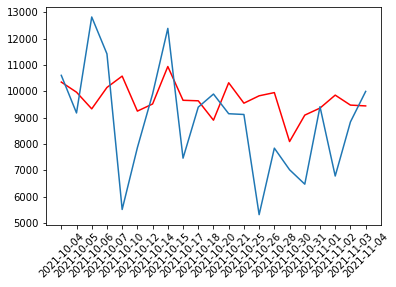

In [344]:
# check model performance
plt.plot(test_df[test_df["subregion1_code"]=="NY"].date, NY_y_pred, c = "red")
plt.plot(test_df[test_df["subregion1_code"]=="NY"].date, NY_y_test) 
plt.xticks(rotation = 45)
pass

### Tuning


In [27]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

In [28]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 150, num = 15)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [10,
               20,
               30,
               40,
               50,
               60,
               70,
               80,
               90,
               100,
               110,
               120,
               130,
               140,
               150,
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8, 10],
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(NY_X_train_new,NY_y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [37]:
# run with best parameter
rf = RandomForestRegressor(n_estimators = 1400,  min_samples_split = 20, min_samples_leaf = 1, max_features = 'sqrt',
 max_depth = 10, bootstrap = True)
rf.fit(NY_X_train_new, NY_y_train)

NY_y_pred_new=rf.predict(NY_X_test_new)
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(NY_y_test, NY_y_pred_new)))

mape = np.mean(np.abs((NY_y_test - NY_y_pred_new) / np.abs(NY_y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))

Root Mean Squared Error (RMSE): 2533.276991402517
Mean Absolute Percentage Error (MAPE): 29.44


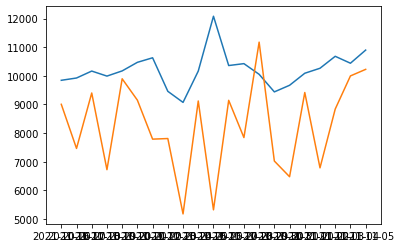

In [48]:
# check model performance
plt.plot(test_date, NY_y_pred_new, c = 'red')
plt.plot(test_date, NY_y_test)

## Train all states in one model, no need

In [53]:
train_df = pd.read_csv("data/train_df.csv")
test_df = pd.read_csv("data/test_df.csv")

In [54]:
train_df = train_df.drop(["date","subregion1_code","cumulative_confirmed"], axis = 1)
test_df = test_df.drop(["date","subregion1_code","cumulative_confirmed"], axis = 1)

In [55]:
y_train = train_df.new_confirmed
X_train = train_df.drop(["new_confirmed"], axis = 1)

y_test = test_df.new_confirmed
X_test = test_df.drop(["new_confirmed"], axis = 1)

In [57]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [58]:
y_pred = rf.predict(X_test)
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error (MAE):', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Root Mean Squared Error (RMSE): 4737.170982549061
Mean Absolute Error (MAE): 51.952067760860245
Mean Absolute Percentage Error (MAPE): inf


In [59]:
#check variable importance
forest_importances = pd.Series(rf.feature_importances_, index= X_train.columns)
indices = np.argsort(forest_importances)[::-1]

In [90]:
np.array(forest_importances[indices])

array([1.10295915e-01, 8.84027685e-02, 7.40297396e-02, 7.13747218e-02,
       5.99691445e-02, 5.55764059e-02, 4.63213069e-02, 3.81847262e-02,
       3.24544273e-02, 2.68042511e-02, 2.63878478e-02, 2.60154743e-02,
       2.50053688e-02, 2.38213196e-02, 2.17201594e-02, 2.08924820e-02,
       2.00262935e-02, 1.83786463e-02, 1.79585895e-02, 1.76314148e-02,
       1.72862379e-02, 1.66840200e-02, 1.58612912e-02, 1.58165393e-02,
       1.56066650e-02, 1.53339379e-02, 1.41435852e-02, 1.40805443e-02,
       1.34111924e-02, 1.32945257e-02, 1.22398214e-02, 8.78393254e-03,
       3.20973025e-03, 2.98797519e-03, 8.99919289e-06])

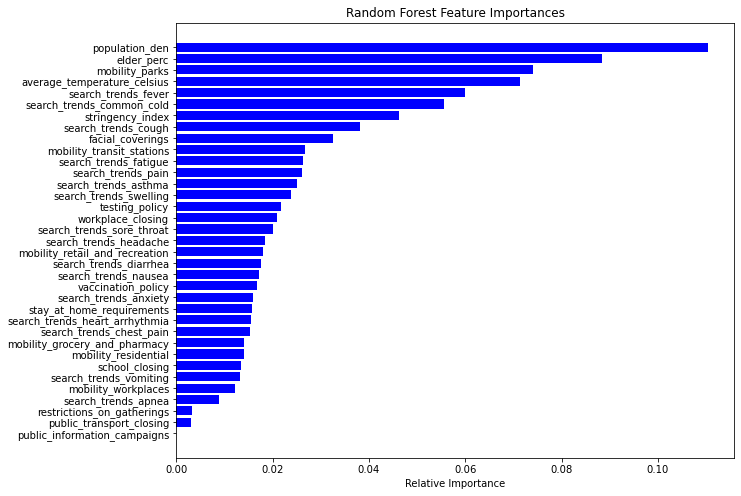

In [108]:
plt.figure(figsize=(10,8))
plt.title('Random Forest Feature Importances')
plt.barh(range(len(indices))[::-1], forest_importances[indices], color='b', align='center')
plt.yticks(range(len(indices))[::-1], [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


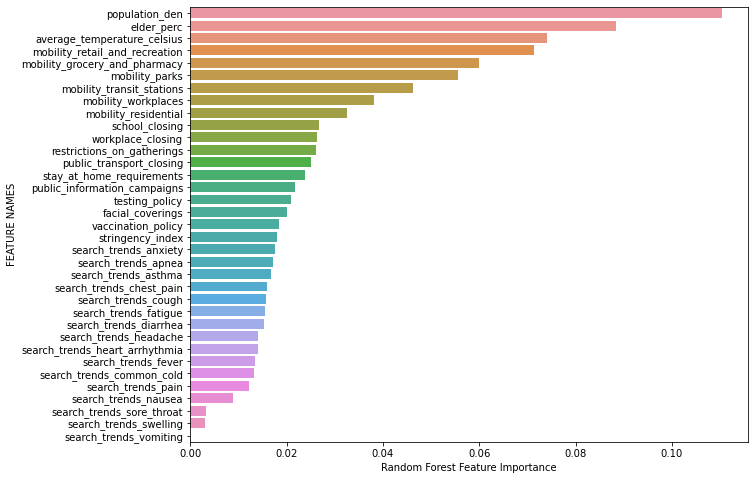

In [101]:
import seaborn as sns
#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
#plt.plot(np.array(forest_importances[indices]),np.array(X_train.columns))
sns.barplot(np.array(forest_importances[indices]),np.array(X_train.columns))
#Add chart labels
plt.xlabel('Random Forest Feature Importance')
plt.ylabel('FEATURE NAMES')
pass

In [62]:
no_list = pd.DataFrame(forest_importances[forest_importances<0.015]).index.tolist()

['mobility_grocery_and_pharmacy',
 'mobility_workplaces',
 'mobility_residential',
 'school_closing',
 'restrictions_on_gatherings',
 'public_transport_closing',
 'public_information_campaigns',
 'search_trends_apnea',
 'search_trends_vomiting']

In [63]:
X_train_new = X_train.drop(no_list, axis = 1)
X_test_new = X_test.drop(no_list, axis = 1)

In [64]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 150, num = 15)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [10,
               20,
               30,
               40,
               50,
               60,
               70,
               80,
               90,
               100,
               110,
               120,
               130,
               140,
               150,
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8, 10],
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_new, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
# run with best parameter
rf = RandomForestRegressor(n_estimators = 1400,  min_samples_split = 20, min_samples_leaf = 1, max_features = 'sqrt',
 max_depth = 10, bootstrap = True)
rf.fit(X_train_new, y_train)

y_pred_new=rf.predict(X_test_new)
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(NY_y_test, NY_y_pred_new)))

mape = np.mean(np.abs((NY_y_test - NY_y_pred_new) / np.abs(NY_y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))

In [ ]:
import joblib
# save model
joblib.dump(rf, "./rf_whole.joblib")

In [ ]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("./rf_whole.joblib")
y_pred=loaded_rf.predict(X_test)

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

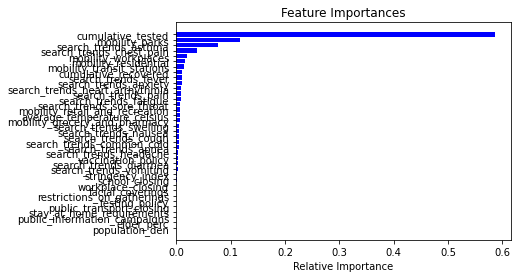

In [178]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), forest_importances [indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()